In [1]:
import numpy as np
from enum import Enum
from pathlib import Path

import numpy as np
import numpy.typing as npt
import typer
from matplotlib import pyplot as plt
from scipy.stats import linregress

from polyshell import reduce_polygon
from polyshell.cli.utils import load_from_path
from polyshell.convex_hull import melkman
from polyshell.reducer.utils import Logger
from polyshell.reducer import ReductionMethods
app = typer.Typer()



In [ ]:

path = Path("data/sea/ionian_sea.pkl")
poly = load_from_path(path)
logger = Logger(len(poly), smooth = False, window = 10, scale = 1, min_iter = 10)
def profiledfunc():
    return reduce_polygon(poly, 1e10, logger)
reduced_poly = reduce_polygon(poly, 1e10, logger)


         89682970 function calls (83182774 primitive calls) in 183.566 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  185.469  185.469 <string>:1(<module>)
90466/90458    0.065    0.000    0.086    0.000 <string>:2(__init__)
1300751/1300189    1.045    0.000    1.046    0.000 <string>:2(__lt__)
        1    0.001    0.001  185.469  185.469 __init__.py:14(reduce_polygon)
104891/104725    0.269    0.000    0.350    0.000 __init__.py:49(create_string_buffer)
8492135/8474777   17.071    0.000   17.360    0.000 __init__.py:517(cast)
1175739/1175308    1.868    0.000    1.869    0.000 __init__.py:521(string_at)
        2    0.000    0.000    0.000    0.000 _arraypad_impl.py:108(<genexpr>)
        2    0.000    0.000    0.000    0.000 _arraypad_impl.py:119(<genexpr>)
        1    0.000    0.000    0.000    0.000 _arraypad_impl.py:128(_set_pad_area)
        1    0.000    0.000    0.000    0.000 _arrayp

In [5]:
len(reduced_poly)

793

In [24]:
logger.vals

array([52820, 48002, 48001, 48001, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000,
       48000])

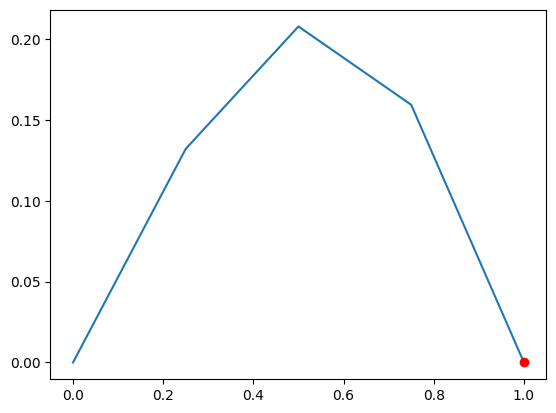

In [31]:
x, y = logger.transform()
plt.plot(x, y)
best_id = logger.max_eps_idx
plt.plot(x[best_id], y[best_id], 'ro')

In [11]:
logger.vals

array([52820, 48604, 48597, 48595, 48594, 48594, 48593, 48593, 48593,
       48593, 48593, 48593, 48593, 48593, 48593, 48593, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592, 48592,
       48592])

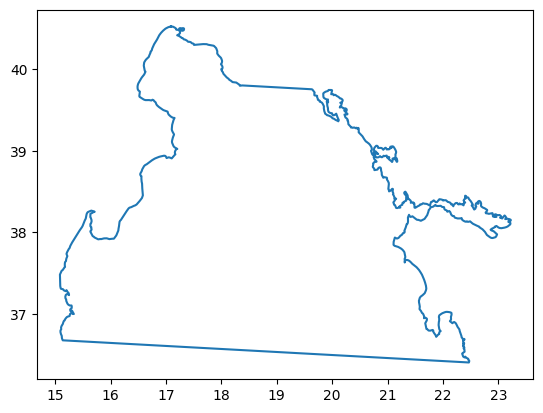

In [7]:
x, y = zip(*reduced_poly)
plt.plot(x, y)

In [22]:
logger.vals

array([52820,  3758,  3210,  2987,  2866,  2799,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749])

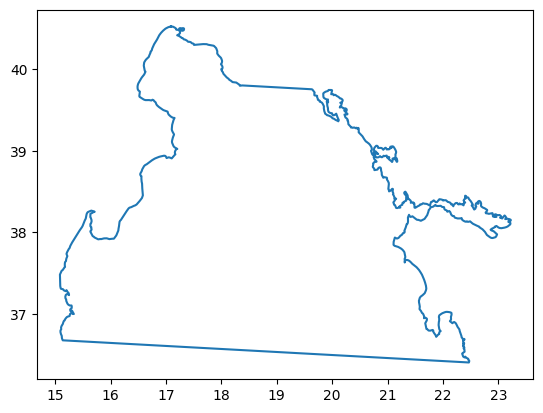

In [25]:
x, y = zip(*reduced_poly)
plt.plot(x, y)

In [26]:
logger.vals

array([52820,  3758,  3210,  2987,  2866,  2799,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,  2749,
        2749])

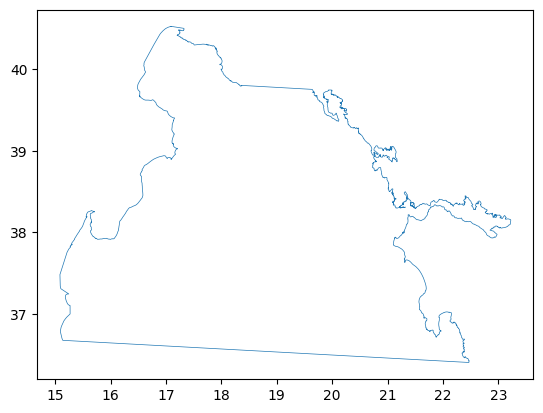

In [6]:
x, y = zip(*reduced_poly)
plt.plot(x, y, linewidth = 0.5)


In [ ]:


min_len = len(melkman(poly))
startup_step = 1e-4,
startup_count=100
# Start-up
startup_eps = startup_step * np.arange(startup_count)
startup_len: list[int] = []
logger = Logger()
for eps in startup_eps:
    poly = reduce_polygon(poly, eps, logger)
    startup_len.append(len(poly))
startup_len = np.array(startup_len)
fit = adaptive_step(startup_eps, startup_len, min_len)



NameError: name 'adaptive_step' is not defined

In [44]:
y = startup_len
#y = np.log(y)
y = _kern_smoothing(y, 10, 1)
x, y = _normalize(np.stack([startup_eps, y]))
y = np.max(y) - y
y = y - x

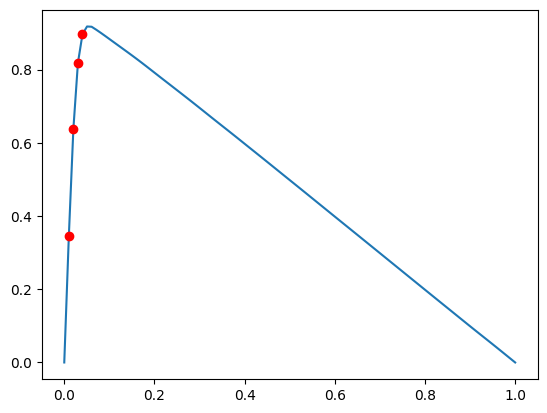

In [45]:
mask = (y[2:] > y[1:-1]) & (y[1:-1] > y[:-2])
cand_points_y = y[1:-1][mask]
cand_points_x = x[1:-1][mask]
plt.plot(x, y)
plt.plot(cand_points_x, cand_points_y, 'ro')

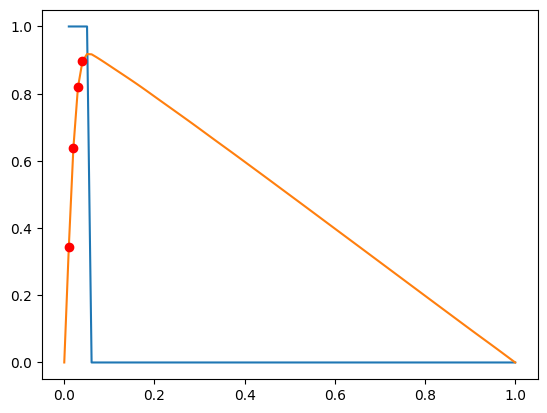

In [46]:
plt.plot(x[1:], y[1:] - y[:-1] > 0)
plt.plot(x, y)
plt.plot(cand_points_x, cand_points_y, 'ro')

In [ ]:


logger = Logger()
reduced_poly = reduce_polygon(poly, 0.00388348637801701, logger, method = ReductionMethods.Charshape)
poly1 = shapely.Polygon(poly)
poly2 = shapely.Polygon(reduced_poly)
poly2.contains(poly1)


NameError: name 'Path' is not defined

In [162]:
red_poly_1 = reduce_polygon(poly, 0.00388348637801702, logger, method = ReductionMethods.Charshape)
red_poly_2 = reduce_polygon(poly, 0.00388348637801701, logger, method = ReductionMethods.Charshape)

tmp1 = [tuple(i) for i in red_poly_1] 
tmp2 = [tuple(i) for i in red_poly_2]

In [166]:
c = np.array(list(set(tmp2).difference(tmp1)))

[Coord(coords=[16.72355175061287, 40.21070647282558]),
 Coord(coords=[16.72339904303155, 40.21169531338826]),
 Coord(coords=[16.723351240467508, 40.21262347669234]),
 Coord(coords=[16.723497867732505, 40.213140844974234]),
 Coord(coords=[16.72379922875149, 40.213335156092725]),
 Coord(coords=[16.72416985015866, 40.21341323882997]),
 Coord(coords=[16.724574327443378, 40.21338164834454]),
 Coord(coords=[16.725025654010892, 40.2132623200002]),
 Coord(coords=[16.725502848677678, 40.21314656736037]),
 Coord(coords=[16.725904822249902, 40.21303284179238]),
 Coord(coords=[16.725706577496737, 40.20598292317352]),
 Coord(coords=[16.726278543619998, 40.20595824757525]),
 Coord(coords=[16.727034449880165, 40.206062674153216]),
 Coord(coords=[16.727846025973435, 40.206318616711044]),
 Coord(coords=[16.72861111161353, 40.20658874517464]),
 Coord(coords=[16.72924494749651, 40.206854224143214]),
 Coord(coords=[16.729637265047757, 40.20705235018589]),
 Coord(coords=[16.72975766628349, 40.2073115114172

array([[16.72355175, 40.21070647],
       [16.72570658, 40.20598292],
       [16.72243655, 40.20569718],
       [16.72784603, 40.20631862],
       [16.72990167, 40.21210456],
       [16.72703445, 40.20606267],
       [16.73012805, 40.21159124],
       [16.72358406, 40.20981431],
       [16.72290993, 40.20544422],
       [16.72627854, 40.20595825],
       [16.72964466, 40.20825887],
       [16.72339225, 40.20941925]])

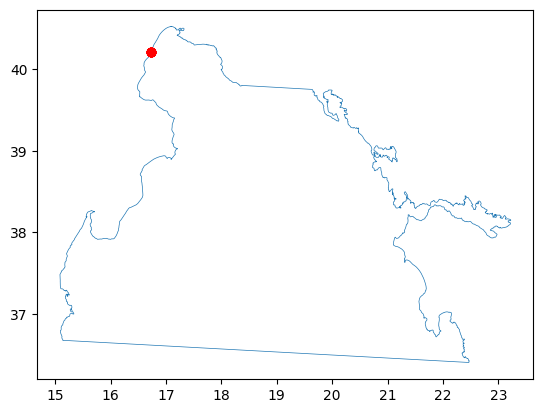

In [68]:
x, y = zip(*red_poly_2)
plt.plot(x, y, linewidth = 0.5)
x1, y1 = zip(*diffs)
plt.plot(x1, y1, 'ro')


In [36]:
poly.points[1]

Coord(coords=[17.09275376757256, 40.52045977090178])

In [34]:
reduced_poly.points[1]

Coord(coords=[17.09275376757256, 40.52045977090178])

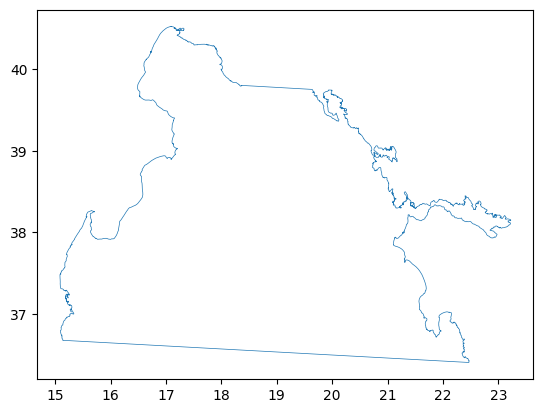

In [24]:
x, y = zip(*reduced_poly)
plt.plot(x, y, linewidth = 0.5)
plt.savefig("test.svg", format = "svg")


In [ ]:
from polyshell.cli.kneepoint_detect import AdaptiveEpsilon

query = AdaptiveEpsilon()

In [12]:
def _normalize(arr: np.ndarray) -> np.ndarray:
    a_min, a_max = np.min(arr,axis = 1), np.max(arr, axis = 1)
    a_min = a_min.reshape(-1,1)
    a_max = a_max.reshape(-1,1)
    return (arr - a_min) / (a_max - a_min)

def _exp_smooth(x,y, window = 10, alpha = 0.5):
        size = x.shape[0]
        alpha_arr = alpha * ((1-alpha) * np.ones(window))**(np.arange(0, window))

def _kern_smoothing(y: np.ndarray, window: int, h = 1) -> np.ndarray:
    if window % 2 == 0:
        window += 1  # enforce odd window
    if window < 3:
        return y
    pad = window // 2
    y_pad = np.pad(y, (pad, pad), mode="edge")
    kern = np.exp(-np.linspace(-2,2,window)**2/h)
    kern = kern/np.sum(kern)
    return np.convolve(y_pad, kern, mode="valid")

def diff_transform(x, y):
    return x, y-x

def local_maxima(x, y):
    # increasing ys
    inc_y = y[1:][y[1:] > y[:-1]]


In [108]:
x, diff_data = x, data-x
inc1 = diff_data[1:-1] < diff_data[2:]
inc2 = diff_data[:-2] < diff_data[1:-1]

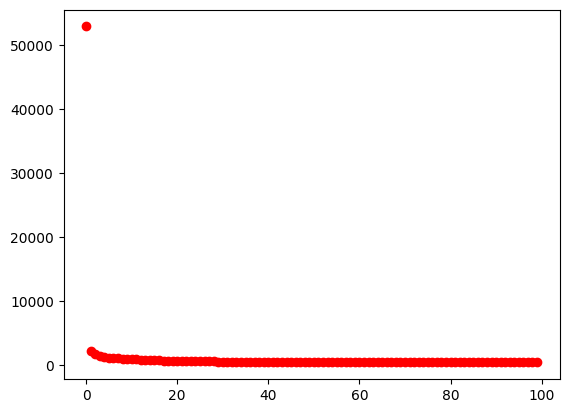

In [243]:
plt.plot(startup_len, 'ro')

In [4]:
inv_len = np.max(startup_len) - startup_len
smth_len = _exp_smooth(inv_len, 10)
plt.plot(smth_len)

NameError: name 'startup_len' is not defined

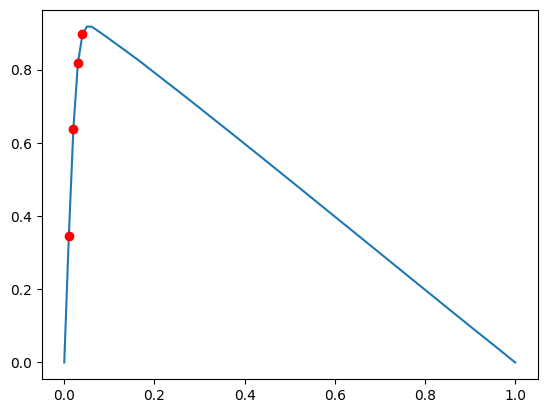

In [220]:
inv_len = np.max(startup_len) - startup_len
smth_len = _kern_smoothing(inv_len, 10)
norm_data = _normalize(np.stack([startup_eps, smth_len]))
norm_eps = norm_data[0,:]
norm_len = norm_data[1,:]
d_len = norm_len - norm_eps
mask = (d_len[2:] > d_len[1:-1]) & (d_len[1:-1] > d_len[:-2])
cand_points_y = d_len[1:-1][mask]
cand_points_x = norm_eps[1:-1][mask]
plt.plot(norm_eps, d_len)
plt.plot(cand_points_x, cand_points_y, 'ro')

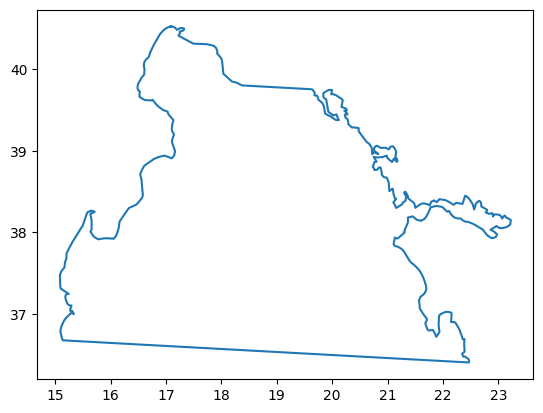

In [222]:
best_eps = startup_eps[1:-1][mask][-1]
path = Path("data/sea/ionian_sea.pkl")
poly_no_log = load_from_path(path)
min_len = len(melkman(poly_no_log))
logger = Logger()
poly_no_log = reduce_polygon(poly_no_log, best_eps, logger)
x, y = zip(*poly_no_log)
plt.plot(x, y)
plt.show()


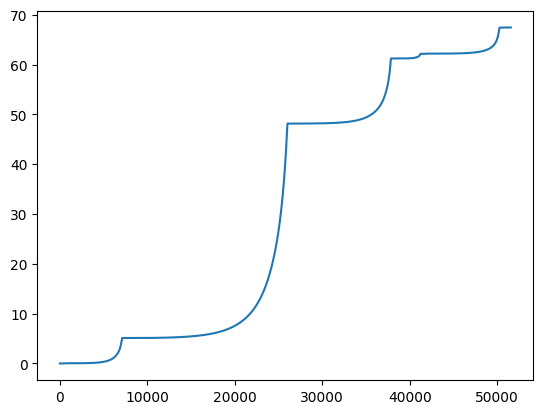

In [232]:
plt.plot(np.cumsum(np.array(logger.vals)))

In [240]:
inv_len = np.max(np.log(startup_len)) - np.log(startup_len)
smth_len = _kern_smoothing(inv_len, 10)
norm_data = _normalize(np.stack([startup_eps, smth_len]))

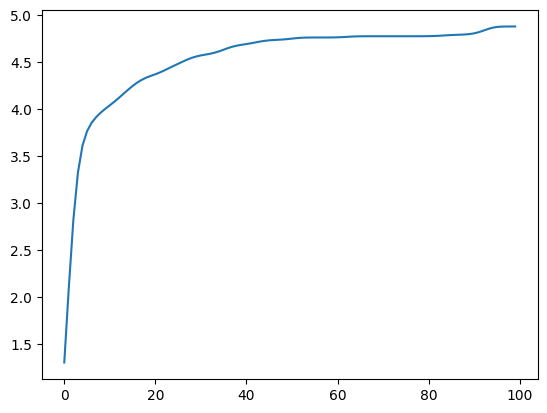

In [241]:
plt.plot(smth_len)

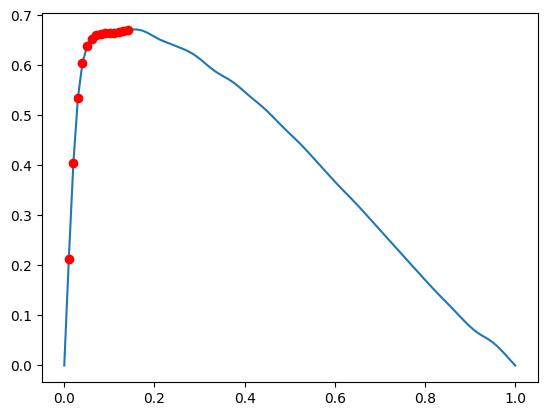

In [234]:
inv_len = np.max(np.log(startup_len)) - np.log(startup_len)
smth_len = _kern_smoothing(inv_len, 10)
norm_data = _normalize(np.stack([startup_eps, smth_len]))
norm_eps = norm_data[0,:]
norm_len = norm_data[1,:]
d_len = norm_len - norm_eps
mask = (d_len[2:] > d_len[1:-1]) & (d_len[1:-1] > d_len[:-2])
cand_points_y = d_len[1:-1][mask]
cand_points_x = norm_eps[1:-1][mask]
plt.plot(norm_eps, d_len)
plt.plot(cand_points_x, cand_points_y, 'ro')

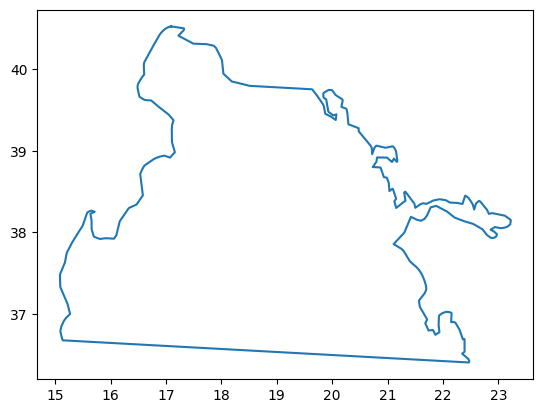

In [235]:
best_eps = startup_eps[1:-1][mask][-1]
path = Path("data/sea/ionian_sea.pkl")
poly_log = load_from_path(path)
min_len = len(melkman(poly_log))
logger_log = Logger()
poly_log = reduce_polygon(poly_log, best_eps, logger_log)
x, y = zip(*poly_log)
plt.plot(x, y)
plt.show()


In [12]:
"""Plot the loss curve."""
path = Path("data/sea/ionian_sea.pkl")
poly = load_from_path(path)
min_len = len(melkman(poly))
startup_step = 1e-4,
startup_count=100
# Start-up
startup_eps = startup_step * np.arange(startup_count)
startup_len: list[int] = []
logger = Logger(len(poly), smooth = False, min_iter = 10000)
for eps in startup_eps:
    poly = reduce_polygon(poly, eps, logger)
    startup_len.append(len(poly))
startup_len = np.array(startup_len)
fit = adaptive_step(startup_eps, startup_len, min_len)

plt.plot(startup_eps, startup_len)
plt.xlabel("Epsilon")
plt.ylabel("No. points")
plt.show()
assert False

    #gamma = 1.0
    #plt.plot(startup_eps, 1 / (startup_len - min_len)**gamma)
    #plt.xlabel("Epsilon")
    #plt.ylabel(f"1 / (No. points - No. hull points)^{gamma:.2f}")
    #plt.show()
    #assert False

    # plt.plot(startup_eps, np.log(startup_len - min_len))
    # plt.xlabel("Epsilon")
    # plt.ylabel("log(No. points - No. hull points)")
    # plt.show()
    # assert False

#Adaptive step
pred_len = np.linspace(min_len, len(poly), 100)[1::][::-1]
eps_vals = (1 / (pred_len - min_len) - fit.intercept) / fit.slope

poly_len: list[int] = []
for eps in eps_vals:
    poly = reduce_polygon(poly, eps)
    poly_len.append(len(poly))

plt.plot(eps_vals, poly_len, label="Loss")
plt.xlabel("Epsilon")
plt.ylabel("Count")
plt.legend()
plt.show()




NameError: name 'adaptive_step' is not defined

In [18]:
logger.vals

array([52717,   856,   654,   562,   507,   474,   452,   438,   432,
         422,   411,   405,   394,   385,   377,   372,   366,   362,
         357,   354,   351,   347,   344,   341,   339,   338,   335,
         331,   329,   328,   327,   326,   325,   324,   321,   321,
         319,   317,   316,   315,   315,   315,   314,   313,   313,
         313,   312,   312,   312,   312,   311,   310,   310,   310,
         310,   310,   310,   310,   310,   310,   310,   310,   309,
         308,   308,   308,   308,   308,   308,   308,   308,   308,
         308,   308,   308,   308,   308,   308,   308,   308,   308,
         307,   307,   307,   306,   305,   305,   305,   305,   304,
         304,   303,   303,   302,   302,   302,   302,   302,   302,
         302])

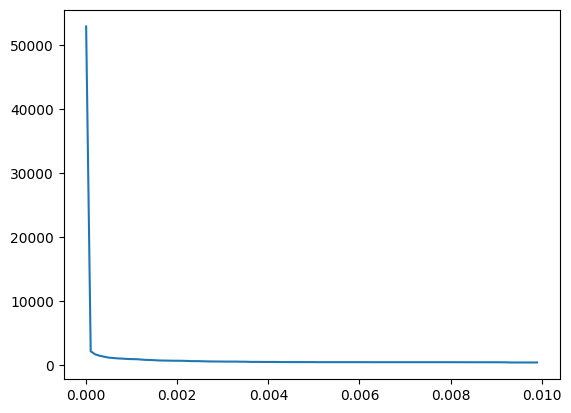

In [17]:
plt.plot(startup_eps, startup_len)

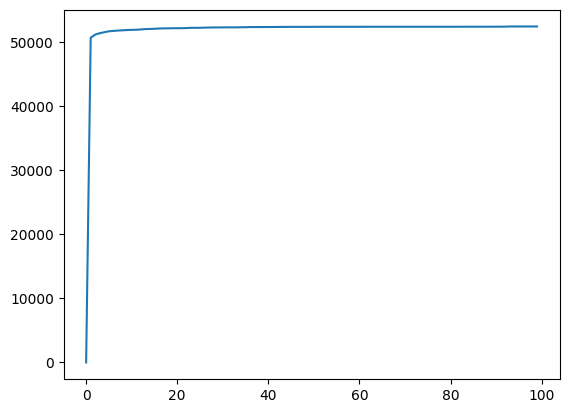

In [13]:
plt.plot(np.max(startup_len) - startup_len)

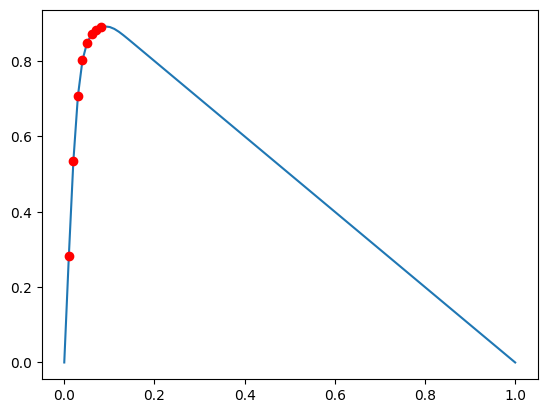

In [16]:
inv_len = np.max(np.log(startup_len)) - np.log(startup_len)
smth_len = _kern_smoothing(inv_len, 10)
norm_data = _normalize(np.stack([startup_eps, smth_len]))
norm_eps = norm_data[0,:]
norm_len = norm_data[1,:]
d_len = norm_len - norm_eps
mask = (d_len[2:] > d_len[1:-1]) & (d_len[1:-1] > d_len[:-2])
cand_points_y = d_len[1:-1][mask]
cand_points_x = norm_eps[1:-1][mask]
plt.plot(norm_eps, d_len)
plt.plot(cand_points_x, cand_points_y, 'ro')

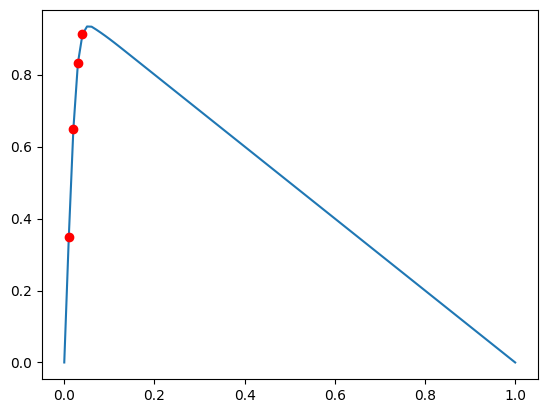

In [18]:
inv_len = np.max(startup_len) - startup_len
smth_len = _kern_smoothing(inv_len, 10)
norm_data = _normalize(np.stack([startup_eps, smth_len]))
norm_eps = norm_data[0,:]
norm_len = norm_data[1,:]
d_len = norm_len - norm_eps
mask = (d_len[2:] > d_len[1:-1]) & (d_len[1:-1] > d_len[:-2])
cand_points_y = d_len[1:-1][mask]
cand_points_x = norm_eps[1:-1][mask]
plt.plot(norm_eps, d_len)
plt.plot(cand_points_x, cand_points_y, 'ro')

In [20]:
best_eps = startup_eps[1:-1][mask][-1]
best_eps

np.float64(0.0004)

In [22]:
poly = reduce_polygon(poly, 0.0004, logger)
len(poly)

929

In [8]:
areas

array([0.00000000e+00, 5.73695077e-09, 1.28227159e-08, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(52888,))

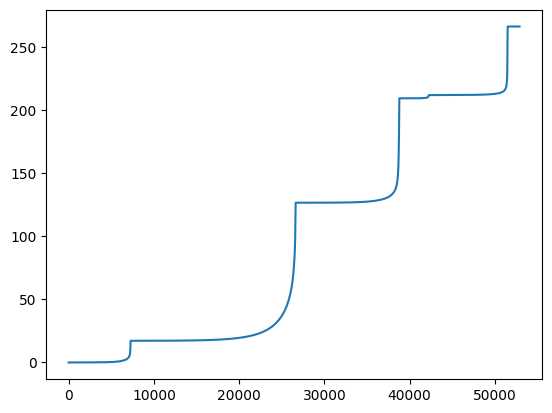

In [9]:
plt.plot(np.arange(areas.shape[0]), np.cumsum(areas))

In [13]:
areas

array([4.08535666e-08, 3.55526363e-07, 6.76390067e-07, 4.82368323e-16,
       0.00000000e+00, 2.98893446e-08, 1.71014286e-07, 5.81064621e-08,
       4.99665961e-07, 2.20610291e-06, 3.47594459e-06, 1.90729458e-15,
       4.16418295e-07, 3.04699435e-15, 4.99881927e-06, 2.82410194e-05,
       1.10185486e-06, 5.46130730e-06, 2.26239224e-06, 3.31627041e-06,
       2.82426884e-06, 6.84667789e-06, 1.24382168e-06, 8.58067797e-05,
       1.64985988e-07, 5.65955441e-07, 1.72307824e-06, 1.92263807e-14,
       1.56482107e-05, 1.07948245e-06, 1.80810003e-05, 9.09790288e-06,
       2.27812094e-04, 3.57151757e-04, 2.16945042e-04, 6.32541741e-04,
       7.31625519e-04, 9.87552890e-04, 3.23668307e-03, 7.99839999e-03,
       7.98732681e-03, 1.26800201e-02, 2.33980022e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.24564912e-04, 1.80499497e-04,
       1.64003898e-04, 2.82769212e-04, 6.84040514e-04, 3.42667947e-03,
       2.46793837e-03, 5.03254345e-03, 8.01876151e-03, 0.00000000e+00,
      